In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from numpy import polyfit, poly1d

# Cryptocurrency Dataset Features
```
date : time of observation
price: price at observation point
market_cap : market capitalization in USD (how much bitcoin/doge are actually worth)
total_volume : volume of transactions on the given day
```
(from https://www.coingecko.com/en/coins/dogecoin/historical_data/usd and https://www.coingecko.com/en/coins/bitcoin/historical_data/usd#panel)

## Bitcoin Dataset

In [2]:
BTC = pd.read_csv (r'btc-usd-max.csv')
BTC.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [3]:
# view range of bitcoin data
BTC.tail()

,snapped_at,price,market_cap,total_volume
2953,2021-05-31 00:00:00 UTC,35714.752020,6.686643e+11,3.065027e+10
2954,2021-06-01 00:00:00 UTC,37340.679266,6.991386e+11,3.795080e+10
2955,2021-06-02 00:00:00 UTC,36680.068202,6.887264e+11,3.353691e+10
2956,2021-06-03 00:00:00 UTC,37685.717982,7.045313e+11,3.124069e+10
2957,2021-06-04 00:00:00 UTC,39151.316184,7.331507e+11,3.339672e+10


In [4]:
# rename snapped_at to date
BTC = BTC.rename(columns={'snapped_at':'date'})
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [5]:
# strip string in snapped_at to remove time
BTC['date'] = BTC['date'].str.split(' ', expand=True)[0]
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


#### Since there hasn't been much fluctuation in Bitcoin and Doge until recent months, we decided to only look at observations for this year (2021).

Text(0.5, 1.0, 'Bitcoin Price over Time')

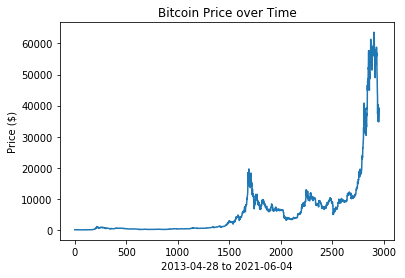

In [6]:
# using indices as dates
b_x = BTC.index
b_price = BTC.price
x1_label = BTC.date.iloc[0] + ' to ' + BTC.date.iloc[-1]

plt.plot(b_x, b_price)
plt.xlabel(x1_label)
plt.ylabel('Price ($)')
plt.title('Bitcoin Price over Time')

In [7]:
threshold = '2021'
BTC = BTC.loc[BTC['date'].loc[:].str.split('-', expand=True)[0] == threshold]
BTC.head()

,date,price,market_cap,total_volume
2803,2021-01-01,29022.418395,5.394380e+11,4.350352e+10
2804,2021-01-02,29352.126792,5.455933e+11,3.408972e+10
2805,2021-01-03,32163.824935,5.978877e+11,5.727344e+10
2806,2021-01-04,33008.226203,6.136169e+11,1.788941e+11
2807,2021-01-05,31515.575967,5.857263e+11,7.465717e+10


In [8]:
BTC = BTC.reset_index()
BTC.head()

,index,date,price,market_cap,total_volume
0,2803,2021-01-01,29022.418395,5.394380e+11,4.350352e+10
1,2804,2021-01-02,29352.126792,5.455933e+11,3.408972e+10
2,2805,2021-01-03,32163.824935,5.978877e+11,5.727344e+10
3,2806,2021-01-04,33008.226203,6.136169e+11,1.788941e+11
4,2807,2021-01-05,31515.575967,5.857263e+11,7.465717e+10


Text(0.5, 1.0, 'Bitcoin Price over Time')

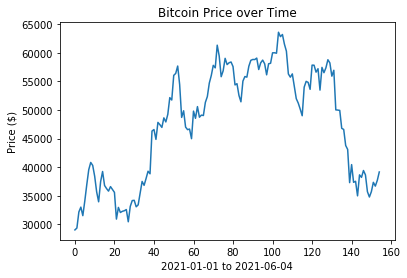

In [9]:
# using indices as dates
b_x = BTC.index
b_price = BTC.price
x1_label = BTC.date.iloc[0] + ' to ' + BTC.date.iloc[-1]

plt.plot(b_x, b_price)
plt.xlabel(x1_label)
plt.ylabel('Price ($)')
plt.title('Bitcoin Price over Time')

Text(0.5, 1.0, 'Bitcoin Market Cap over Time')

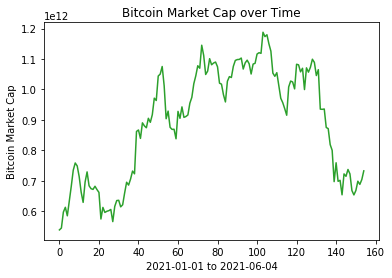

In [10]:
b_cap = BTC.market_cap

plt.plot(b_x, b_cap, 'tab:green')
plt.xlabel(x1_label)
plt.ylabel('Bitcoin Market Cap')
plt.title('Bitcoin Market Cap over Time')

Text(0.5, 1.0, 'Bitcoin Total Volume over Time')

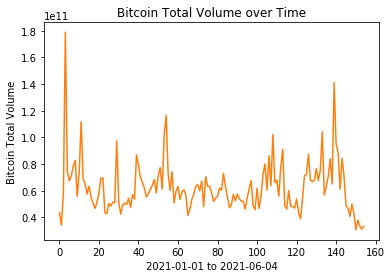

In [11]:
b_volume = BTC.total_volume

plt.plot(b_x, b_volume, 'tab:orange')
plt.xlabel(x1_label)
plt.ylabel('Bitcoin Total Volume')
plt.title('Bitcoin Total Volume over Time')

## Doge Dataset

In [12]:
DOGE = pd.read_csv (r'doge-usd-max.csv')
DOGE.head()

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3488670.0,0.0
1,2013-12-17 00:00:00 UTC,0.000218,1619159.0,0.0
2,2013-12-18 00:00:00 UTC,0.000268,2191987.0,0.0
3,2013-12-19 00:00:00 UTC,0.000475,4299422.0,0.0
4,2013-12-20 00:00:00 UTC,0.000989,9866232.0,0.0


In [13]:
# rename snapped_at to date
DOGE = DOGE.rename(columns={'snapped_at':'date'})
# strip string in snapped_at to remove time
DOGE['date'] = DOGE['date'].str.split(' ', expand=True)[0]
DOGE.head()

,date,price,market_cap,total_volume
0,2013-12-15,0.000559,3488670.0,0.0
1,2013-12-17,0.000218,1619159.0,0.0
2,2013-12-18,0.000268,2191987.0,0.0
3,2013-12-19,0.000475,4299422.0,0.0
4,2013-12-20,0.000989,9866232.0,0.0


In [14]:
DOGE.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

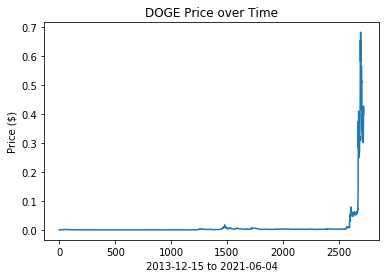

In [15]:
# using indices in replace of dates
x2=DOGE.index
x2_label = DOGE.date.iloc[0] + ' to ' + DOGE.date.iloc[-1]

plt.plot(x2,DOGE.price)
plt.xlabel(x2_label)
plt.ylabel('Price ($)')
plt.title('DOGE Price over Time')

In [16]:
doge = DOGE.loc[DOGE['date'].loc[:].str.split('-', expand=True)[0] == threshold]
doge.head()

,date,price,market_cap,total_volume
2571,2021-01-01,0.004707,5.978876e+08,1.276148e+08
2572,2021-01-02,0.005538,7.075762e+08,2.446071e+08
2573,2021-01-03,0.010603,1.354820e+09,3.117161e+09
2574,2021-01-04,0.010087,1.288355e+09,2.306839e+09
2575,2021-01-05,0.009592,1.226307e+09,1.238833e+09


In [17]:
doge = doge.reset_index()
doge.head()

,index,date,price,market_cap,total_volume
0,2571,2021-01-01,0.004707,5.978876e+08,1.276148e+08
1,2572,2021-01-02,0.005538,7.075762e+08,2.446071e+08
2,2573,2021-01-03,0.010603,1.354820e+09,3.117161e+09
3,2574,2021-01-04,0.010087,1.288355e+09,2.306839e+09
4,2575,2021-01-05,0.009592,1.226307e+09,1.238833e+09


In [18]:
doge.tail()

,index,date,price,market_cap,total_volume
150,2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
151,2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
152,2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
153,2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
154,2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

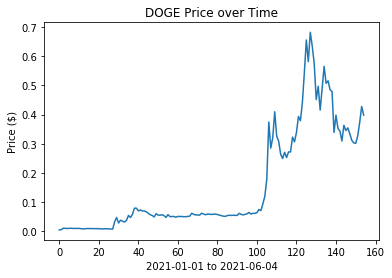

In [19]:
doge_x2 = doge.index
d_price = doge.price

x2_label = doge.date.iloc[0] + ' to ' + doge.date.iloc[-1]
plt.plot(doge_x2, d_price)
plt.xlabel(x2_label)
plt.ylabel('Price ($)')
plt.title('DOGE Price over Time')

Text(0.5, 1.0, 'DOGE Market Cap over Time')

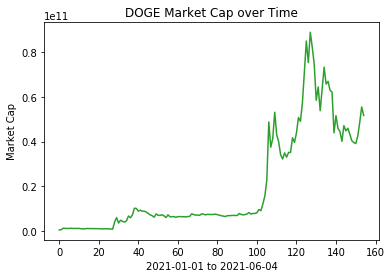

In [20]:
d_cap = doge.market_cap

plt.plot(doge_x2, d_cap, 'tab:green')
plt.xlabel(x2_label)
plt.ylabel('Market Cap')
plt.title('DOGE Market Cap over Time')

Text(0.5, 1.0, 'DOGE Total Volume over Time')

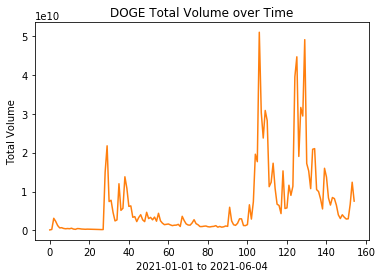

In [21]:
d_volume=doge.total_volume

plt.plot(doge_x2, d_volume,'tab:orange')
plt.xlabel(x2_label)
plt.ylabel('Total Volume')
plt.title('DOGE Total Volume over Time')

# Model Selection: Multiple Polynomial Regression
Goal: select the model with the lowest cross-validated test MSE (mean squared error) to balance bias/variance and prevent overfitting

> $CV_k = \frac{1}{k} \sum_{i=1}^{k} MSE_i$

## Leave-one-out cross-validation (LOOCV)
- Choose 1 data point to use for validation/test & train remaining (n-1) observations
- Repeat n times using a different observation point as the test each time
- Same as K-Fold when k=n

In [22]:
# use sklearn for k-fold (and loocv) cross-validation
from sklearn.model_selection import KFold

In [23]:
# cross-validation method returns the lowest train and test MSE and the polynomial model with the lowest test MSE
def cv(deg, k, dataset):
    kf = KFold(n_splits = k, shuffle = True, random_state = 0)
    mse_train = []
    mse_test = []
    models = []

    for train_i, val_i in kf.split(dataset):
        
        # y value used to fit polynomial model
        y_train = dataset.iloc[train_i,:].price
        y_test = dataset.iloc[val_i,:].price
        
        # step 1: train model with baseline model
        model = poly1d(polyfit(train_i, y_train, deg = deg))
        models.append(model)

        # step 2: fit test observation point to polynomial 
        yhat_train = model(train_i)
        yhat_test = model(val_i)

        # step 3: append MSEs`
        diffsq_train = (y_train - yhat_train)**2
        diffsq_test = (y_test - yhat_test)**2
        
        mse_train.append(np.mean(diffsq_train))
        mse_test.append(np.mean(diffsq_test))
        
    # find the index with the lowest mse
    train_min = np.argmin(mse_train)
    test_min = np.argmin(mse_test)
    
    return mse_train[train_min], mse_test[test_min], models[test_min]

In [24]:
# returns the "best" trained polynomial models for each of the degrees and the corresponding train and test mse's
# best is defined as the model with the lowest test mse
def train(data, k_val, degrees):
    # create polynomial model for a range of degrees 
    cv_model_min = []
    cv_train_mse = []
    cv_test_mse = []    

    for deg in degrees:
        # k = n for loocv
        k = k_val
        mse_train, mse_test, model = cv(deg, k, data)

        cv_train_mse.append(mse_train)
        cv_model_min.append(model)
        cv_test_mse.append(mse_test)
        
    return cv_model_min, cv_train_mse, cv_test_mse

In [25]:
# function returns a plot of least test mse's for each cross-validation method of each Polynomial model for the dataset
def graph_mse(degrees, dataset, cv, cv_train_mse, cv_test_mse):
    fig, axs = plt.subplots(1,2, figsize=(16,5))
    
    axs[0].plot(degrees, cv_test_mse, '-co', label='Test')
    axs[0].set_xlabel("Degree of Polynomial")
    axs[0].set_ylabel("Minimum Test MSE for %s" % dataset)
    axs[0].set_title('Least Test MSE for each %s Polynomial with %s' % (dataset, cv))
    axs[0].legend()

    axs[1].plot(degrees, cv_train_mse, '-mo', label='Train')
    axs[1].set_xlabel("Degree of Polynomial")
    axs[1].set_ylabel("Minimum Train MSE for %s" % dataset)
    axs[1].set_title('Least Train MSE for each %s Polynomial with %s' % (dataset, cv))
    axs[1].legend()

    axs[0].grid()
    axs[1].grid()
    
    return axs

In [26]:
# returns "best" polynomial model and the corresponding lowest test mse and graphs the model over original dataset
# also prints the degree of the "best" polynomial model
def graph_model(dataset, cv, cv_min_models, cv_test_mse):
    # find index of lowest mse out of all the polynomial degrees
    cv_index = np.argmin(cv_test_mse)

    # find the polynomial model with the lowest test mse 
    cv_model = cv_min_models[cv_index]
    print("Polynomial degree with the lowest test MSE: %d" % (cv_index+1))
    
    x = [];
    x_label = "";
    original_y = [];
    
    if (dataset == 'doge' or dataset == 'DOGE' or dataset == 'Doge'):
        x = doge_x2
        x_label = x2_label
        original_y = d_price
    elif(dataset == 'BTC' or dataset == 'bitcoin' or dataset == 'Bitcoin'):
        x = b_x
        x_label = x1_label
        original_y = b_price
    else:
        return;

    # plot original price of Doge
    plt.plot(x, original_y, '-cd', markersize=2, label="Original Data")
    plt.xlabel(x_label)
    plt.title('%s Polynomial Fit of %s Price over Time' % (cv, dataset))
    
        
    # price of doge from the best polynomial degree model
    y_model = cv_model(x)
    
    plt.plot(x, y_model, 'tab:orange', label="Polynomial Fit with %s" % cv)
    plt.xlabel(x_label)
    plt.ylabel('Price of %s ($)' % dataset)

    plt.legend()
    return cv_model, cv_test_mse[cv_index]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B753C278>,
      dtype=object)

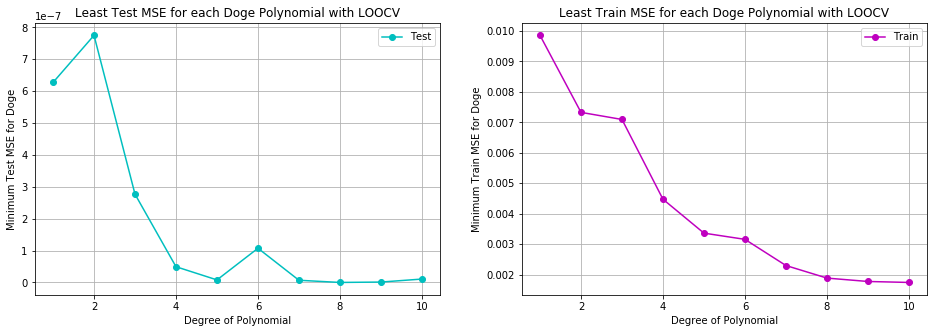

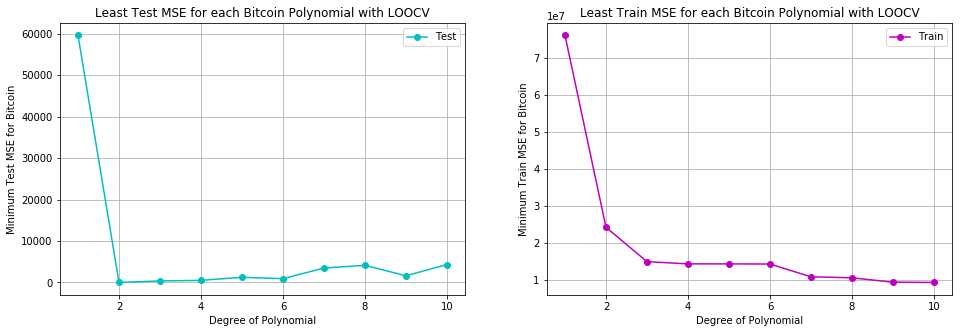

In [27]:
poly_degrees = range(1,11)
doge_loocv_models, doge_train_mse, doge_test_mse = train(doge, len(doge), poly_degrees)
graph_mse(poly_degrees, 'Doge', 'LOOCV', doge_train_mse, doge_test_mse)

btc_loocv_models, btc_train_mse, btc_test_mse = train(BTC, len(BTC), poly_degrees)
graph_mse(poly_degrees, 'Bitcoin', 'LOOCV', btc_train_mse, btc_test_mse)

LOOCV for Bitcoin
Polynomial degree with the lowest test MSE: 2
Optimal Polynomial Model: 
       2
-4.08 x + 721.4 x + 2.44e+04
Lowest Test MSE: 5.406605906114733


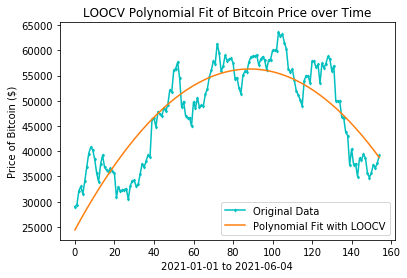

In [28]:
print('LOOCV for Bitcoin')
# graph_model() graphs and returns "best" polynomial model and the corresponding mse
btc_loocv, btc_mse = graph_model('Bitcoin', 'LOOCV', btc_loocv_models, btc_test_mse)

# lowest test mse and best polynomial model with loocv
print('Optimal Polynomial Model: \n%s' % btc_loocv)
print('Lowest Test MSE: %s' % btc_mse)

LOOCV for DOGE
Polynomial degree with the lowest test MSE: 8
Optimal Polynomial Model: 
           8             7             6             5             4
3.437e-15 x - 1.926e-12 x + 4.324e-10 x - 5.006e-08 x + 3.212e-06 x
              3            2
 - 0.0001145 x + 0.002133 x - 0.01638 x + 0.0357
Lowest Test MSE: 3.8817630274264796e-11


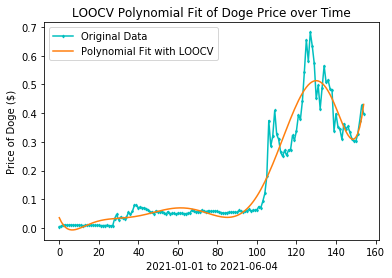

In [29]:
print('LOOCV for DOGE')
doge_loocv, doge_mse = graph_model('Doge', 'LOOCV', doge_loocv_models, doge_test_mse)

# lowest test mse and best polynomial model with loocv
print('Optimal Polynomial Model: \n%s' % doge_loocv)
print('Lowest Test MSE: %s' % doge_mse)

In [30]:
def graph_all(total_data, dataset, cv, cv_models):
    x = [];
    y = [];
    x_label = "";
    
    if (dataset == 'doge' or dataset == 'DOGE' or dataset == 'Doge'):
        x = doge_x2
        x_label = x2_label
        y = d_price
    elif(dataset == 'BTC' or dataset == 'bitcoin' or dataset == 'Bitcoin'):
        x = b_x
        x_label = x1_label
        y = b_price
    else:
        return;

    # plot models of all the polynomial degrees
    plt.figure(figsize=(10,8))
    plt.plot(x, y, '-o', markersize=2, label="original data")
    plt.xlabel(x_label)
    plt.ylabel('Price of %s ($)' % dataset)
    plt.title('%s Price over Time for all Polynomial Models with %s' % (dataset, cv))
    
    for x in range(len(cv_models)):
        # plot each cv model with lowest test mse
        model = cv_models[x]
        y = model(range(total_data))
        plt.plot(range(total_data), y, '-o', markersize=1.2, label='degree %s' % (x+1), alpha=0.5)

    plt.legend()

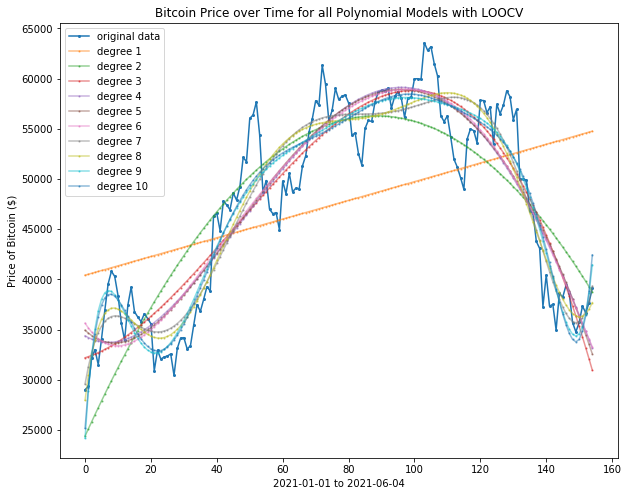

In [31]:
graph_all(len(BTC), "Bitcoin", "LOOCV", btc_loocv_models)

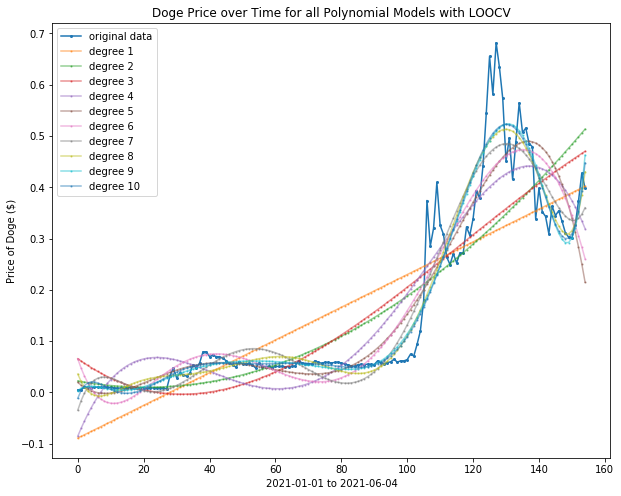

In [32]:
graph_all(len(doge), "Doge", "LOOCV", doge_loocv_models)

#### Note that there is approximately a 2 month gap between the second and third data point since we are only plotting observations that reach a certain price threshold to get a better.

Text(0.5, 1.0, 'Predicted Bitcoin Price w/ LOOCV for the next 2 Weeks')

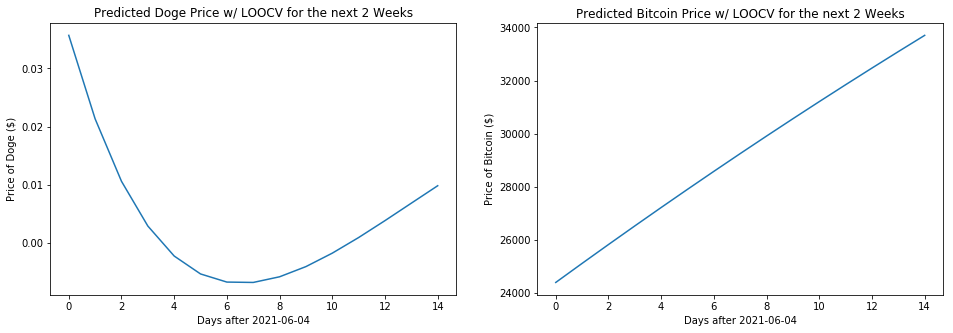

In [43]:
fig, axs = plt.subplots(1,2, figsize=(16,5))

# predicted doge price for future 14 days
days = range(15)
doge_y_loocv = doge_loocv(days)
axs[0].plot(days, doge_y_loocv)
axs[0].set_ylabel('Price of Doge ($)')
axs[0].set_xlabel('Days after %s' % doge.date.iloc[-1])
axs[0].set_title("Predicted Doge Price w/ LOOCV for the next 2 Weeks")

# predicted doge price for future 14 days
btc_y_loocv = btc_loocv(days)
axs[1].plot(days, btc_y_loocv)
axs[1].set_ylabel('Price of Bitcoin ($)')
axs[1].set_xlabel('Days after %s' % BTC.date.iloc[-1])
axs[1].set_title("Predicted Bitcoin Price w/ LOOCV for the next 2 Weeks")

## k-Fold cross-validation
- Randomly assign each data point to one of k data subsets/folds
- Choose one fold as test set & train remaining (k-1) folds
- Same as LOOCV when k=n

### Perform K = 10 for 10-Fold Cross-Validation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B7E57B38>,
      dtype=object)

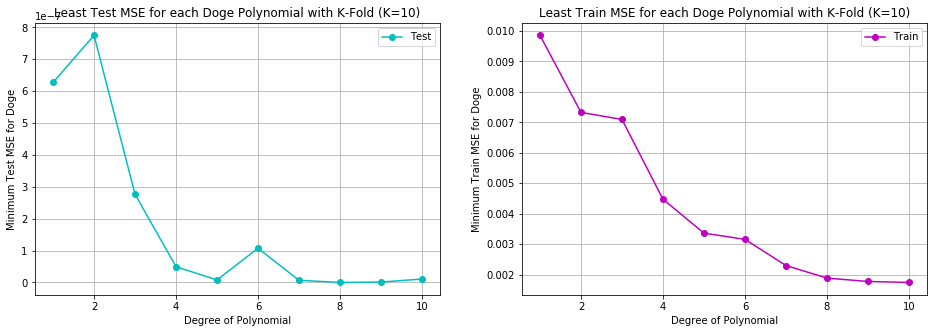

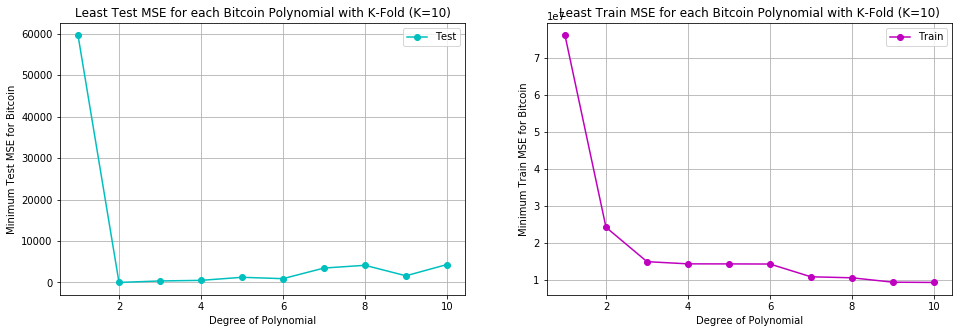

In [34]:
doge_k_models, doge_k_train_mse, doge_k_test_mse = train(doge, len(doge), poly_degrees)
graph_mse(poly_degrees, 'Doge', 'K-Fold (K=10)', doge_k_train_mse, doge_k_test_mse)

btc_k_models, btc_k_train_mse, btc_k_test_mse = train(BTC, len(BTC), poly_degrees)
graph_mse(poly_degrees, 'Bitcoin', 'K-Fold (K=10)', btc_k_train_mse, btc_k_test_mse)

K-Fold (K=10) for Doge
Polynomial degree with the lowest test MSE: 8
Optimal Polynomial Model: 
           8             7             6             5             4
3.437e-15 x - 1.926e-12 x + 4.324e-10 x - 5.006e-08 x + 3.212e-06 x
              3            2
 - 0.0001145 x + 0.002133 x - 0.01638 x + 0.0357
Lowest Test MSE: 3.8817630274264796e-11


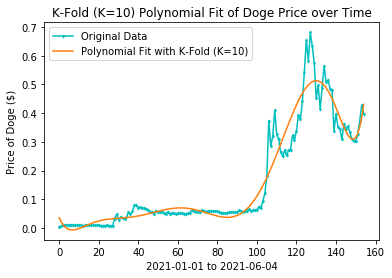

In [35]:
print('K-Fold (K=10) for Doge')
# graph_model() graphs and returns "best" polynomial model and the corresponding mse
doge_kfold, doge_k_mse = graph_model('Doge', 'K-Fold (K=10)', doge_k_models, doge_k_test_mse)

# lowest test mse and best polynomial model with k-fold where k=10
print('Optimal Polynomial Model: \n%s' % doge_kfold)
print('Lowest Test MSE: %s' % doge_k_mse)

K-Fold (K=10) for Bitcoin
Polynomial degree with the lowest test MSE: 2
Optimal Polynomial Model: 
       2
-4.08 x + 721.4 x + 2.44e+04
Lowest Test MSE: 5.406605906114733


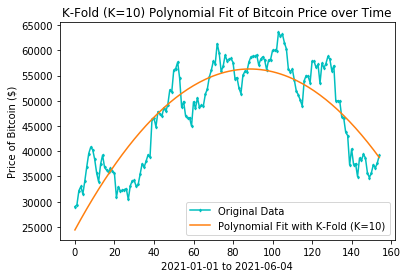

In [36]:
print('K-Fold (K=10) for Bitcoin')
btc_kfold, btc_k_mse = graph_model('Bitcoin', 'K-Fold (K=10)', btc_k_models, btc_k_test_mse)

# lowest test mse and best polynomial model with k-fold where k=10
print('Optimal Polynomial Model: \n%s' % btc_kfold)
print('Lowest Test MSE: %s' % btc_k_mse)

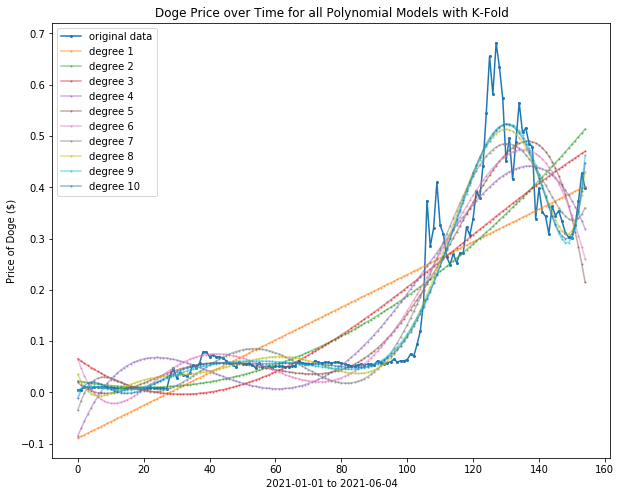

In [37]:
graph_all(len(doge), "Doge", "K-Fold", doge_k_models)

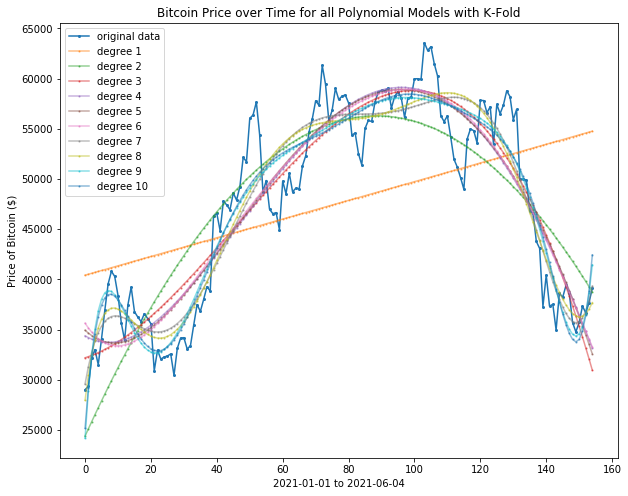

In [38]:
graph_all(len(BTC), "Bitcoin", "K-Fold", btc_k_models)

Text(0.5, 1.0, 'Predicted Bitcoin Price w/ K-Fold (K=10) for the next 2 Weeks')

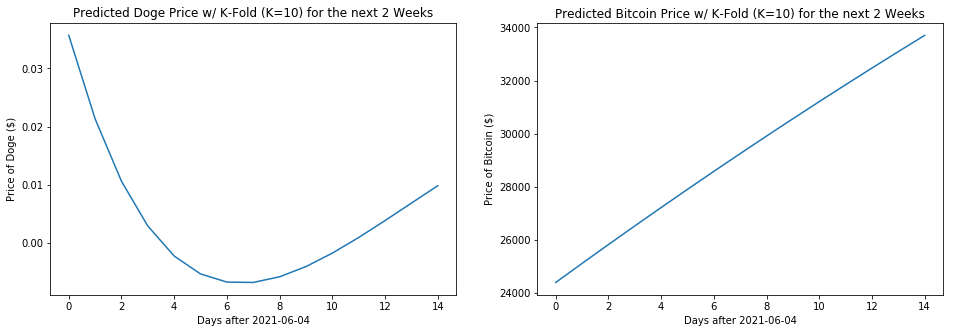

In [44]:
fig, axs = plt.subplots(1,2, figsize=(16,5))

# predicted doge price for future 14 days
days = range(15)
doge_y_k = doge_kfold(days)
axs[0].plot(days, doge_y_k)
axs[0].set_ylabel('Price of Doge ($)')
axs[0].set_xlabel('Days after %s' % doge.date.iloc[-1])
axs[0].set_title("Predicted Doge Price w/ K-Fold (K=10) for the next 2 Weeks")

# predicted doge price for future 14 days
btc_y_k = btc_kfold(days)
axs[1].plot(days, btc_y_k)
axs[1].set_ylabel('Price of Bitcoin ($)')
axs[1].set_xlabel('Days after %s' % BTC.date.iloc[-1])
axs[1].set_title("Predicted Bitcoin Price w/ K-Fold (K=10) for the next 2 Weeks")

# Model Estimation
* can get confidence intervals and show standard error bars

In [40]:
def btc_accuracy(model_prediction):
    sum_cv = 0
    for y in range(len(model_prediction)):
        if (model_prediction[y] == BTC.price[y]):
            sum_cv+=1
    return sum_cv/len(model_prediction)

In [41]:
def doge_accuracy(model_prediction):
    sum_cv = 0
    for y in range(len(model_prediction)):
        if (model_prediction[y] == doge.price[y]):
            sum_cv+=1
    return sum_cv/len(model_prediction)

In [42]:
# calculate accuracy of each model

print(btc_accuracy(btc_y_loocv))
print(btc_accuracy(btc_y_k))

print(doge_accuracy(doge_y_loocv))
print(doge_accuracy(doge_y_k))

0.0
0.0
0.0
0.0
